<a href="https://colab.research.google.com/github/jugeromel/IA/blob/main/notas_alunos_qcim_logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import files
uploaded = files.upload()

Saving dados_qcim - dados_qcim (1).csv to dados_qcim - dados_qcim (1) (1).csv


In [28]:
import pandas as pd

df = pd.read_csv("dados_qcim - dados_qcim (1).csv")
df.head()

,Ano,Nº Inscr.,Nome,Data nascimento,Idade quando fez o concurso,PO,RE,PT,MF
0,2020,4000067,RHUAN FERREIRA SANT ANA,20/07/93,27,"66,0","75,0","24,0","59,4"
1,2020,4000104,JONATHAN MATOS DE FARIA,15/02/95,25,"80,0","84,0","32,0","71,2"
2,2020,4001166,JONATHAN MACHADO PINTO PEREIRA,15/01/92,28,"72,0","80,0","20,0","63,2"
3,2020,4001588,MICAEL LUCAS MONTEIRO PEDROSA,28/06/97,23,"68,0","76,5","20,0","60,1"
4,2020,4002054,EDELSO NEPOMUCENO DE OLIVEIRA JUNIOR,26/12/92,27,"68,0","81,5","24,0","61,9"


In [43]:
# Substituir vírgula por ponto e converter para float
df["MF"] = df["MF"].str.replace(",", ".").astype(float)


AttributeError: Can only use .str accessor with string values!

In [44]:
df["PO"] = df["PO"].str.replace(",", ".").astype(float)

In [46]:
df["RE"] = df["RE"].str.replace(",", ".").astype(float)

In [47]:
df["PT"] = df["PT"].str.replace(",", ".").astype(float)

In [30]:
# Converter MF para numérico (float)
df["MF"] = pd.to_numeric(df["MF"], errors="coerce")

# Agora pode aplicar a lógica de aprovados
df["Aprovado"] = "Não aprovado"

for ano, vagas in vagas_dict.items():
    mask = df["no"] == ano
    idx_aprovados = df.loc[mask].nlargest(vagas, "MF").index
    df.loc[idx_aprovados, "Aprovado"] = "Aprovado"


In [31]:
import pandas as pd

# Exemplo de tabela de vagas por ano
vagas_dict = {
    2020: 5,
    2021: 3,
    2022: 5,
    2023: 5,
    2024: 5,
    2025: 9
}


# Criar a coluna "Aprovado" com base nas vagas por ano
df["Aprovado"] = "Não aprovado"

for ano, vagas in vagas_dict.items():
    # Seleciona apenas o ano correspondente
    mask = df["Ano"] == ano
    # Pega os índices das maiores MFs (até o limite das vagas)
    idx_aprovados = df.loc[mask].nlargest(vagas, "MF").index
    # Marca como aprovado
    df.loc[idx_aprovados, "Aprovado"] = "Aprovado"

print(df)


     Ano  Nº Inscr.                                  Nome Data nascimento  \
0   2020    4000067               RHUAN FERREIRA SANT ANA        20/07/93   
1   2020    4000104               JONATHAN MATOS DE FARIA        15/02/95   
2   2020    4001166        JONATHAN MACHADO PINTO PEREIRA        15/01/92   
3   2020    4001588         MICAEL LUCAS MONTEIRO PEDROSA        28/06/97   
4   2020    4002054  EDELSO NEPOMUCENO DE OLIVEIRA JUNIOR        26/12/92   
..   ...        ...                                   ...             ...   
81  2024    4005773              VICTORIA DA SILVA FRANCO      02/04/1998   
82  2024    4005829               TULIO GOMES DE OLIVEIRA      20/05/1998   
83  2024    4006004           LEONARDO ALVES PEREIRA TUNA      09/02/1998   
84  2024    4006282          JULIO CESAR DE OLIVEIRA MELO      20/12/2000   
85  2024    4007170      MATHEUS GABRIEL F. DE FIGUEIREDO      11/08/1996   

    Idade quando fez o concurso    PO    RE    PT    MF      Aprovado  
0  

In [32]:
# Tabela de concorrência
concorrencia_df = pd.DataFrame({
    "Ano": [2020, 2021, 2022, 2023, 2024, 2025],
    "inscritos": [575, 438, 360, 338, 284, 222],
    "concorrencia": [115, 146, 72, 67.6, 56.8, 24.7]
})

# Juntar com o df principal (pelo ano)
df = df.merge(concorrencia_df, on="Ano", how="left")

print(df.head())


    Ano  Nº Inscr.                                  Nome Data nascimento  \
0  2020    4000067               RHUAN FERREIRA SANT ANA        20/07/93   
1  2020    4000104               JONATHAN MATOS DE FARIA        15/02/95   
2  2020    4001166        JONATHAN MACHADO PINTO PEREIRA        15/01/92   
3  2020    4001588         MICAEL LUCAS MONTEIRO PEDROSA        28/06/97   
4  2020    4002054  EDELSO NEPOMUCENO DE OLIVEIRA JUNIOR        26/12/92   

   Idade quando fez o concurso    PO    RE    PT    MF      Aprovado  \
0                           27  66,0  75,0  24,0  59.4  Não aprovado   
1                           25  80,0  84,0  32,0  71.2      Aprovado   
2                           28  72,0  80,0  20,0  63.2  Não aprovado   
3                           23  68,0  76,5  20,0  60.1  Não aprovado   
4                           27  68,0  81,5  24,0  61.9  Não aprovado   

   inscritos  concorrencia  
0        575         115.0  
1        575         115.0  
2        575         11

In [50]:
# Tabela de concorrência
concorrencia_df = pd.DataFrame({
    "Ano": [2020, 2021, 2022, 2023, 2024],
    "inscritos": [575, 438, 360, 338, 284],
    "concorrencia": [115, 146, 72, 67.6, 56.8]
})

# Juntar com o df principal (pelo ano)
df = df.merge(concorrencia_df, on="Ano", how="left")

print(df.head())

    Ano  Nº Inscr.                                  Nome Data nascimento  Idade quando fez o concurso    PO    RE    PT    MF      Aprovado  inscritos_x  concorrencia_x  aprovado_bin  inscritos_y  concorrencia_y
0  2020    4000067               RHUAN FERREIRA SANT ANA        20/07/93                           27  66.0  75.0  24.0  59.4  Não aprovado          575           115.0             0          575           115.0
1  2020    4000104               JONATHAN MATOS DE FARIA        15/02/95                           25  80.0  84.0  32.0  71.2      Aprovado          575           115.0             1          575           115.0
2  2020    4001166        JONATHAN MACHADO PINTO PEREIRA        15/01/92                           28  72.0  80.0  20.0  63.2  Não aprovado          575           115.0             0          575           115.0
3  2020    4001588         MICAEL LUCAS MONTEIRO PEDROSA        28/06/97                           23  68.0  76.5  20.0  60.1  Não aprovado          575

In [33]:
# Média geral por ano
media_geral = df.groupby("Ano")["MF"].mean().reset_index(name="media_geral")

# Média apenas dos aprovados por ano
media_aprovados = df[df["Aprovado"] == "Aprovado"].groupby("Ano")["MF"].mean().reset_index(name="media_aprovados")

# Juntar as duas tabelas
medias = media_geral.merge(media_aprovados, on="Ano")

print(medias)


    Ano  media_geral  media_aprovados
0  2020    62.768421        69.040000
1  2021    66.077778        73.666667
2  2022    60.132000        68.740000
3  2023    54.840000        60.660000
4  2024    55.234783        64.320000


([<matplotlib.axis.XTick at 0x78e67ad9ffe0>,
 [Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

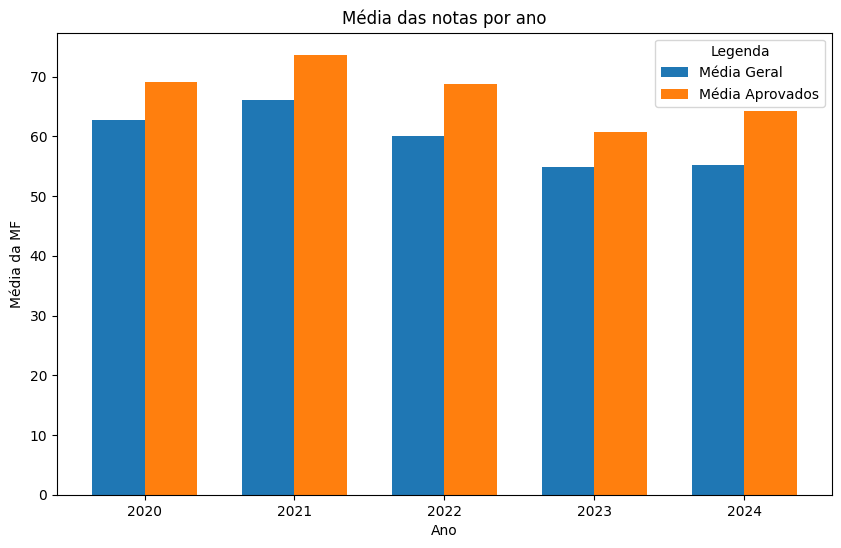

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Cálculo das médias ---
# Média geral por ano
media_geral = df.groupby("Ano")["MF"].mean().reset_index(name="media_geral")

# Média apenas dos aprovados por ano
media_aprovados = (
    df[df["Aprovado"] == "Aprovado"]
    .groupby("Ano")["MF"]
    .mean()
    .reset_index(name="media_aprovados")
)

# Junta em um único DataFrame
medias = media_geral.merge(media_aprovados, on="Ano")

# --- Gráfico ---
x = medias["Ano"]
largura = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(10,6))

# Barras lado a lado
b1 = ax.bar(x - largura/2, medias["media_geral"], width=largura, label="Média Geral")
b2 = ax.bar(x + largura/2, medias["media_aprovados"], width=largura, label="Média Aprovados")


# Legendas e título
ax.set_xlabel("Ano")
ax.set_ylabel("Média da MF")
ax.set_title("Média das notas por ano")
ax.legend(title="Legenda")  # aqui aparece o que é azul e o que é laranja
plt.xticks(x)


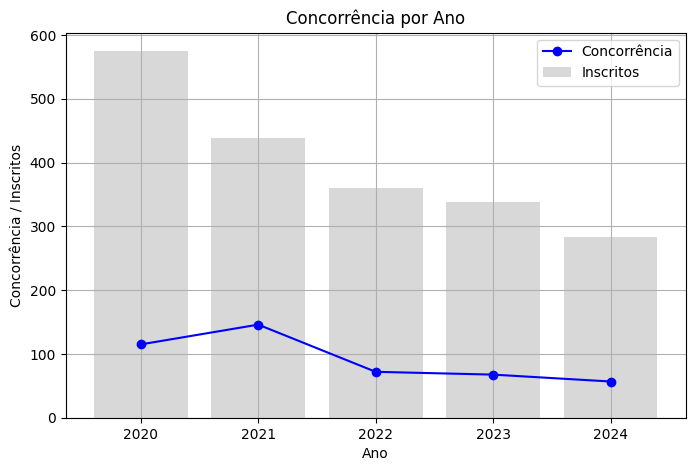

In [51]:
import matplotlib.pyplot as plt

# Agrupar média de MF por ano (opcional, se quiser mostrar junto)
media_geral = df.groupby("Ano")["MF"].mean().reset_index(name="media_geral")

# Gráfico da concorrência por ano
plt.figure(figsize=(8,5))
plt.plot(concorrencia_df["Ano"], concorrencia_df["concorrencia"], marker='o', linestyle='-', color='blue', label="Concorrência")
plt.bar(concorrencia_df["Ano"], concorrencia_df["inscritos"], alpha=0.3, color='gray', label="Inscritos")

plt.title("Concorrência por Ano")
plt.xlabel("Ano")
plt.ylabel("Concorrência / Inscritos")
plt.legend()
plt.grid(True)
plt.show()


In [36]:
# Mostra as primeiras linhas de todo o DataFrame
pd.set_option('display.max_columns', None)  # garante que todas as colunas sejam exibidas
pd.set_option('display.width', 1000)        # evita quebra de linha no display
print(df.head())  # ou use df.tail() para ver o final


    Ano  Nº Inscr.                                  Nome Data nascimento  Idade quando fez o concurso    PO    RE    PT    MF      Aprovado  inscritos  concorrencia
0  2020    4000067               RHUAN FERREIRA SANT ANA        20/07/93                           27  66,0  75,0  24,0  59.4  Não aprovado        575         115.0
1  2020    4000104               JONATHAN MATOS DE FARIA        15/02/95                           25  80,0  84,0  32,0  71.2      Aprovado        575         115.0
2  2020    4001166        JONATHAN MACHADO PINTO PEREIRA        15/01/92                           28  72,0  80,0  20,0  63.2  Não aprovado        575         115.0
3  2020    4001588         MICAEL LUCAS MONTEIRO PEDROSA        28/06/97                           23  68,0  76,5  20,0  60.1  Não aprovado        575         115.0
4  2020    4002054  EDELSO NEPOMUCENO DE OLIVEIRA JUNIOR        26/12/92                           27  68,0  81,5  24,0  61.9  Não aprovado        575         115.0


In [38]:
df['aprovado_bin'] = df['Aprovado'].apply(lambda x: 1 if x == 'Aprovado' else 0)


In [49]:
import statsmodels.api as sm

# Variáveis independentes
X = df[['Idade quando fez o concurso', 'PT', 'MF', 'inscritos', 'concorrencia']]

# Adiciona constante
X = sm.add_constant(X)

# Variável dependente
y = df['aprovado_bin']

# Ajusta modelo logit
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.256734
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           aprovado_bin   No. Observations:                   86
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                            5
Date:                Wed, 24 Sep 2025   Pseudo R-squ.:                  0.5579
Time:                        03:31:16   Log-Likelihood:                -22.079
converged:                       True   LL-Null:                       -49.940
Covariance Type:            nonrobust   LLR p-value:                 9.273e-11
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -29.0361     10.509     -2.763      0.006   